In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from model_functions import to_evaluate_optimal_metrics

##### Прочитаем собранные данные.

In [3]:
merged_data = pd.read_csv('merged_data.csv', index_col=0)
merged_data.head()

,"Динамика населения на 2016 г., в %","Динамика населения на 2018 г., в %","Динамика населения на 2020 г., в %","Динамика населения на 2021 г., в %","Динамика населения на 2022 г., в %","Динамика среднедушевых денежных доходов на 2019 г., в %","Динамика среднедушевых денежных доходов на 2020 г., в %",Реальные денежные доходы в 2016 году в % к предыдущему году,Реальные денежные доходы в 2017 году в % к предыдущему году,Реальные денежные доходы в 2018 году в % к предыдущему году,...,Динамика новорождённых в 2020 году,Динамика новорождённых в 2021 году,"Отношение числа умерших за 2015 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2016 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2017 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2018 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в сельской местности к числу новорожденных, в %"
Белгородская область,0.142189,-0.192483,0.111993,-0.509440,-0.606128,5.114042,1.511499,100.8,99.1,98.7,...,-6.410062,-1.044365,0.380654,0.417125,0.284523,0.279369,0.174269,0.202396,0.121230,0.178109
Брянская область,-0.583889,-0.782283,-0.641233,-0.822564,-1.176225,6.718074,0.793063,95.0,99.4,102.1,...,-5.464699,-4.567511,0.476292,0.500785,0.562624,0.296656,0.259274,0.305907,0.109693,0.126582
Владимирская область,-0.600805,-0.810450,-0.541000,-1.201178,-1.373967,7.727601,2.224150,92.2,100.9,96.4,...,-9.302742,-3.359684,0.466716,0.459711,0.440463,0.355506,0.385374,0.503953,0.134433,0.098814
Воронежская область,0.099951,-0.070223,-0.155338,-0.800145,-0.777669,5.721549,0.174880,93.6,97.4,100.0,...,-2.453800,-2.964355,0.389600,0.384955,0.401374,0.360116,0.376725,0.302698,0.035636,0.062627
Ивановская область,-0.681931,-0.833097,-0.701567,-1.013203,-1.024688,5.268743,1.872528,98.5,100.4,94.4,...,-4.879889,-3.120455,0.408129,0.456009,0.313860,0.306547,0.389888,0.330557,0.113193,0.039667


##### Стандартизируем признаки.

In [4]:
ss_scaler = StandardScaler()
ss_scaler.fit(merged_data)
merged_data_scaler = pd.DataFrame(data=ss_scaler.transform(merged_data), index=merged_data.index, columns=merged_data.columns)
merged_data_scaler.head()

,"Динамика населения на 2016 г., в %","Динамика населения на 2018 г., в %","Динамика населения на 2020 г., в %","Динамика населения на 2021 г., в %","Динамика населения на 2022 г., в %","Динамика среднедушевых денежных доходов на 2019 г., в %","Динамика среднедушевых денежных доходов на 2020 г., в %",Реальные денежные доходы в 2016 году в % к предыдущему году,Реальные денежные доходы в 2017 году в % к предыдущему году,Реальные денежные доходы в 2018 году в % к предыдущему году,...,Динамика новорождённых в 2020 году,Динамика новорождённых в 2021 году,"Отношение числа умерших за 2015 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2016 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2017 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2018 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в сельской местности к числу новорожденных, в %"
Белгородская область,0.189711,-0.041365,0.352382,-0.100777,-0.153531,-0.427965,-0.443651,0.929241,-0.157998,-0.715378,...,-0.956669,0.839072,-0.455449,0.097705,-0.863242,-0.643916,-1.491943,-0.851970,-0.353876,0.241857
Брянская область,-0.715026,-0.899193,-0.707034,-0.290337,-0.819160,0.642649,-0.713723,-0.057015,-0.005386,0.588180,...,-0.700432,-0.485580,0.419817,0.829710,1.960627,-0.454877,-0.742039,-0.099647,-0.441434,-0.257843
Владимирская область,-0.736104,-0.940160,-0.566056,-0.519544,-1.050038,1.316460,-0.175755,-0.533138,0.757675,-1.597196,...,-1.740718,-0.031455,0.332176,0.470325,0.720185,0.188664,0.370395,1.339759,-0.253686,-0.527134
Воронежская область,0.137080,0.136455,-0.023620,-0.276765,-0.353817,-0.022483,-0.946107,-0.295076,-1.022801,-0.216959,...,0.115659,0.117183,-0.373572,-0.183782,0.323269,0.239070,0.294093,-0.122970,-1.003444,-0.878073
Ивановская область,-0.837192,-0.973099,-0.791894,-0.405747,-0.642230,-0.324709,-0.307935,0.538139,0.503321,-2.363995,...,-0.541922,0.058492,-0.204005,0.437926,-0.565349,-0.346716,0.410220,0.079507,-0.414870,-1.100741


##### Поскольку проводить кластеризацию на всех 70 признаках, возможно, будет слишком долго, воспользуемся методом главных компонент - PCA - чтобы на основе имеющихся признаков отобрать наиболее важные линейные комбинации этих признаков.

## Кластеризация регионов на основе признаков, полученных алгоритмом PCA (метод главных компонент).

### Алгоритм KMeans.

##### Для алгоритма KMeans необходимо задавать число кластеров, на которые мы хотим разбить наши данные. В качестве метрик, по которым мы будем судить о том, какое число кластеров лучше всего взять, будем использовать коэффициент силуэта (в идеальном случае должен быть близок к 1) и индекс Дэвиса-Болдина (в идеальном случае должен быть близок к 0).

##### Для расчёта оптимального числа главных компонент алгоритма PCA и числа кластеров применим функцию из файла model_functions.py.

##### Сначала произведём расчёты для такого числа компонент, которые объясняли бы от 70 до 90% разброса в данных.

In [5]:
to_evaluate_optimal_metrics(merged_data_scaler, np.arange(0.7, 0.9, 0.05), "KMeans", np.arange(2, 11))

Максимальный коэффициент силуэта, равный 0.318919, получается при 0.7 главных компонентах.
Число кластеров при максимальном коэффициенте силуэта - [4].
Минимальный индекс Дэвиса-Болдина, равный 1.212152, получается при 0.7 главных компонентах.
Число кластеров при минимальном индексе Дэвиса-Болдина - [5].


##### Теперь посчитаем для определённого числа компонент.

In [6]:
to_evaluate_optimal_metrics(merged_data_scaler, np.arange(2, 10), "KMeans", np.arange(2, 11))

Максимальный коэффициент силуэта, равный 0.590104, получается при 2 главных компонентах.
Число кластеров при максимальном коэффициенте силуэта - [3].
Минимальный индекс Дэвиса-Болдина, равный 0.598814, получается при 2 главных компонентах.
Число кластеров при минимальном индексе Дэвиса-Болдина - [5].


##### И у нас получилась одна единственная комбинация, когда получаются максимальный коэффициент силуэта и минимальный индекс Дэвиса-Болдина. Такой результат получается при 2 главных компонентах алгоритма PCA и при разбиении данных на 3 кластера.

##### Теперь на вычисленных наилучших гиперпараметрах разобьём регионы на кластеры.

Первая главная компонента объясняет 0.14 долю дисперсии.
Вторая главная компонента объясняет 0.1 долю дисперсии.


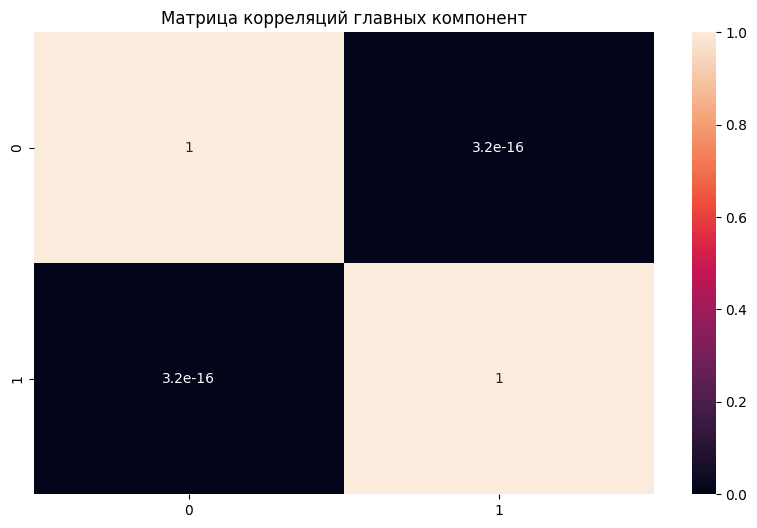

In [7]:
pca = PCA(n_components=2, random_state=42)
pca.fit(merged_data_scaler)
data_pca = pca.transform(merged_data_scaler)
print("Первая главная компонента объясняет {0} долю дисперсии.".format(np.round(pca.explained_variance_ratio_[0], 2)))
print("Вторая главная компонента объясняет {0} долю дисперсии.".format(np.round(pca.explained_variance_ratio_[1], 2)))

data_pca = pd.DataFrame(data=data_pca, index=merged_data_scaler.index)
figure, axes = plt.subplots(figsize=(10, 6))
sns.heatmap(data=data_pca.corr(), ax=axes, annot=True)
axes.set_title("Матрица корреляций главных компонент");

##### К сожалению, 2 самых важных признака объясняют всего лишь 24% разброса данных.

##### Поскольку мы отбираем 2 признака для кластеризации, мы можем визуализировать наши регионы в виде диаграммы рассеяния. Построим визуализацию нашей плоскости признаков.

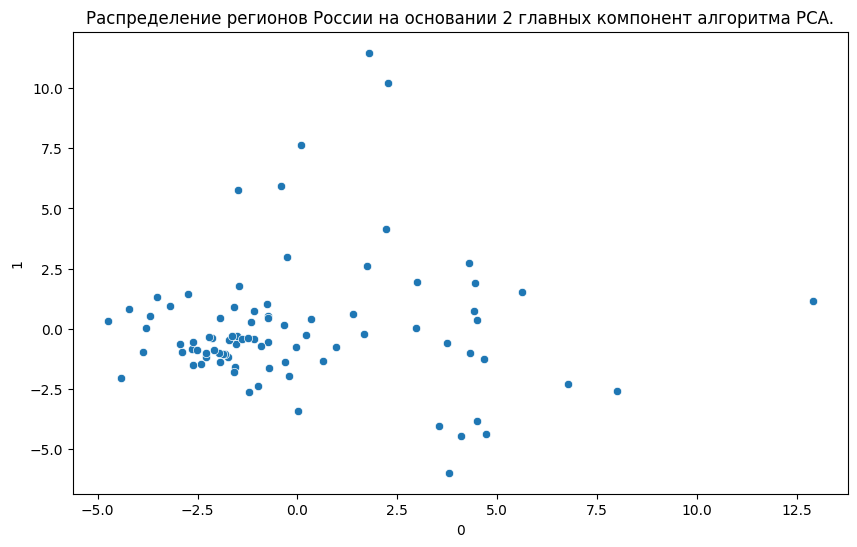

In [8]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=data_pca, x=0, y=1, ax=axes)
axes.set_title('Распределение регионов России на основании 2 главных компонент алгоритма PCA.');

##### Проводим кластеризацию на 3 кластера.

In [9]:
k_means_opt = KMeans(n_clusters=3, random_state=42, n_init=10)
k_means_opt.fit(data_pca)
k_means_pca_3 = data_pca.copy()
k_means_pca_3['predict'] = k_means_opt.predict(k_means_pca_3)
k_means_pca_3.head()

,0,1,predict
Белгородская область,1.393986,0.604456,0
Брянская область,-2.642004,-0.855368,0
Владимирская область,-2.420757,-1.452491,0
Воронежская область,-1.081048,-0.429380,0
Ивановская область,-3.866806,-0.971361,0


##### Визуализируем получившиеся кластеры.

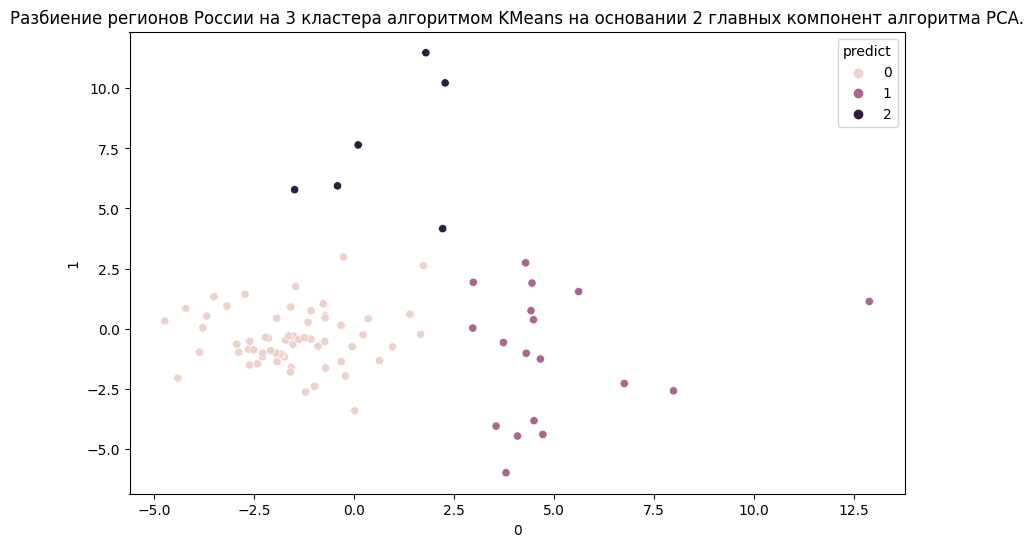

In [10]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=k_means_pca_3, x=0, y=1, hue='predict', ax=axes)
axes.set_title('Разбиение регионов России на 3 кластера алгоритмом KMeans на основании 2 главных компонент алгоритма PCA.');

##### Проводим кластеризацию на 5 кластеров.

In [11]:
k_means_opt = KMeans(n_clusters=5, random_state=42, n_init=10)
k_means_opt.fit(data_pca)
k_means_pca_5 = data_pca.copy()
k_means_pca_5['predict'] = k_means_opt.predict(k_means_pca_5)
k_means_pca_5.head()

,0,1,predict
Белгородская область,1.393986,0.604456,1
Брянская область,-2.642004,-0.855368,2
Владимирская область,-2.420757,-1.452491,2
Воронежская область,-1.081048,-0.429380,2
Ивановская область,-3.866806,-0.971361,2


##### Визуализируем получившиеся кластеры.

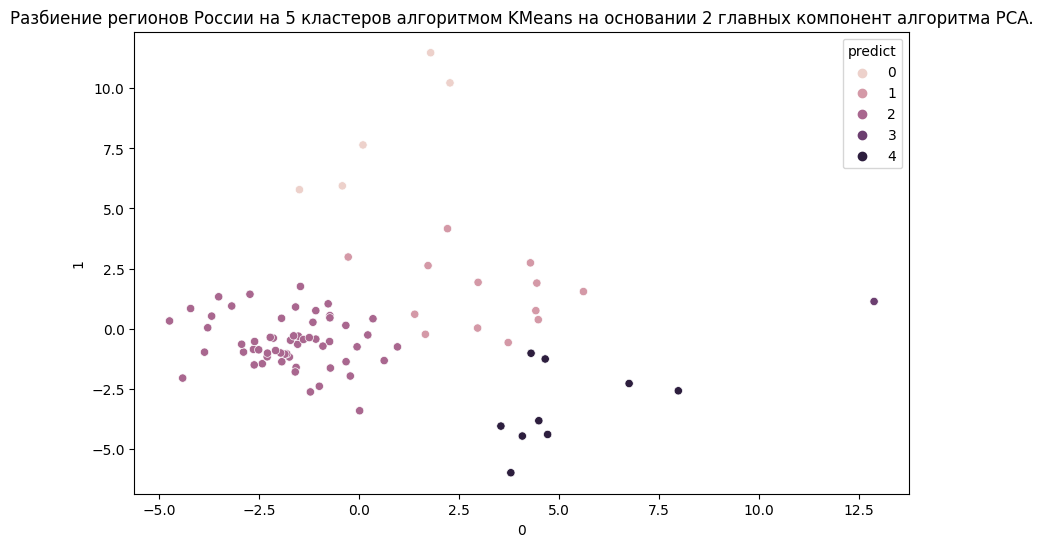

In [12]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=k_means_pca_5, x=0, y=1, hue='predict', ax=axes)
axes.set_title('Разбиение регионов России на 5 кластеров алгоритмом KMeans на основании 2 главных компонент алгоритма PCA.');

##### Мы можем сравнить 2 варианта алгоритма KMeans с помощью индекса Калински-Харабаса: чем значение индекса больше, тем лучше.

In [13]:
print(f"Значение индекса Калински-Харабаса для алгоритма KMeans на 3 кластерах - {np.round(calinski_harabasz_score(data_pca, k_means_pca_3['predict']), 6)}.")
print(f"Значение индекса Калински-Харабаса для алгоритма KMeans на 5 кластерах - {np.round(calinski_harabasz_score(data_pca, k_means_pca_5['predict']), 6)}.")

Значение индекса Калински-Харабаса для алгоритма KMeans на 3 кластерах - 85.345104.
Значение индекса Калински-Харабаса для алгоритма KMeans на 5 кластерах - 81.989528.


##### Таким образом, поскольку значение индекса Калински-Харабаса больше при кластеризации на 3 кластера, мы можем утверждать, что такое разбиение лучше, чем разбиение на 5 кластеров.

### EM-алгоритм.

##### Настало время для мягкой кластеризации - EM-алгоритма.

In [14]:
to_evaluate_optimal_metrics(merged_data_scaler, np.arange(2, 10), "GaussianMixture", np.arange(2, 11))

Максимальный коэффициент силуэта, равный 0.55804, получается при 2 главных компонентах.
Число кластеров при максимальном коэффициенте силуэта - [6].
Минимальный индекс Дэвиса-Болдина, равный 0.64229, получается при 2 главных компонентах.
Число кластеров при минимальном индексе Дэвиса-Болдина - [10].


##### А вот в случае EM-алгоритма получилось 2 набора параметров, при которых получаются оптимальные метрики. Рассмотрим оба варианта.

##### Заметим, что в обоих случаях значения получившихся метрик немного хуже, чем получились при кластеризации алгоритмом KMeans (примерно 0.59 и 0.6 для коэффициента силуэта и индекса Дэвиса-Болдина соответственно).

##### Поскольку число главных компонент не поменялось и осталось таким же, как и было при алгоритме KMeans, приводить распределение в виде диаграммы рассеивания не будем.

In [15]:
gm_opt_6 = GaussianMixture(n_components=6, random_state=42)
gm_opt_6.fit(data_pca)
gm_pca = data_pca.copy()
gm_pca['predict'] = gm_opt_6.predict(gm_pca)
gm_pca.head()

,0,1,predict
Белгородская область,1.393986,0.604456,0
Брянская область,-2.642004,-0.855368,0
Владимирская область,-2.420757,-1.452491,0
Воронежская область,-1.081048,-0.429380,0
Ивановская область,-3.866806,-0.971361,0


##### Визуализируем получившиеся кластеры.

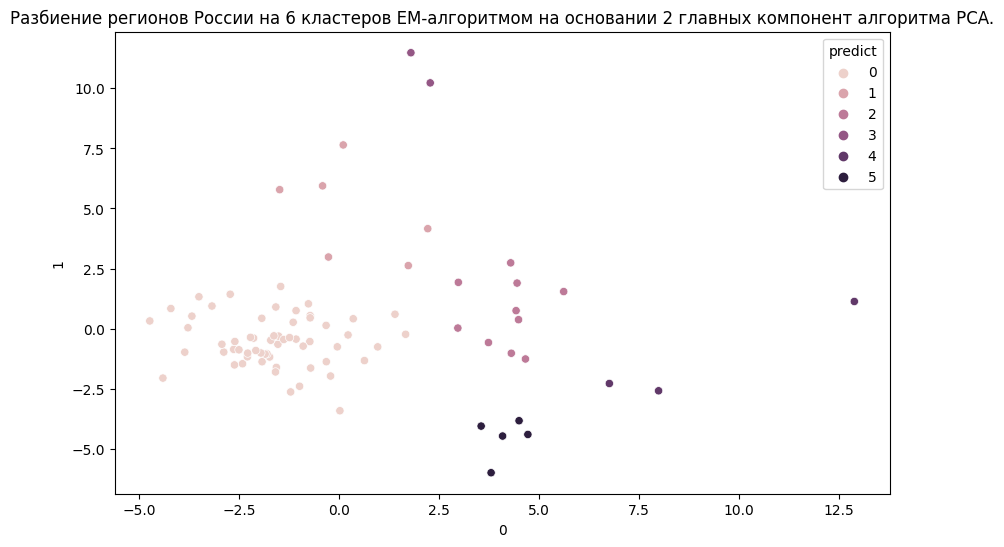

In [16]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=gm_pca, x=0, y=1, hue='predict', ax=axes)
axes.set_title('Разбиение регионов России на 6 кластеров EM-алгоритмом на основании 2 главных компонент алгоритма PCA.');

##### Теперь, руководствуясь минимальным значением индекса Дэвиса-Болдина, проведём кластеризацию на 10 кластеров.

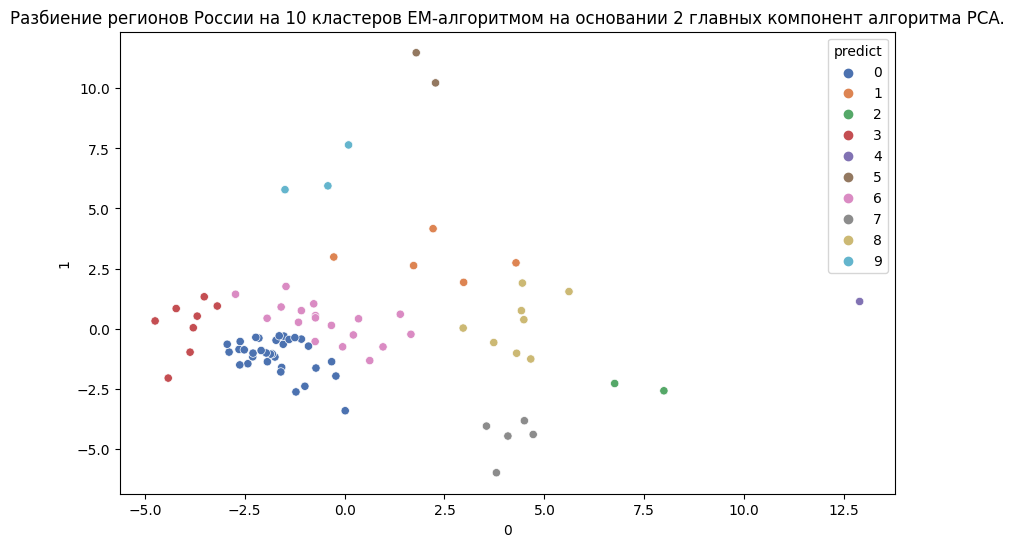

In [17]:
gm_opt_10 = GaussianMixture(n_components=10, random_state=42)
gm_opt_10.fit(data_pca)
gm_pca = data_pca.copy()
gm_pca['predict'] = gm_opt_10.predict(gm_pca)

figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=gm_pca, x=0, y=1, hue='predict', palette='deep', ax=axes)
axes.set_title('Разбиение регионов России на 10 кластеров EM-алгоритмом на основании 2 главных компонент алгоритма PCA.');

##### Сравним 2 варианта EM-алгоритма с помощью индекса Калински-Харабаса.

In [18]:
print(f"Значение индекса Калински-Харабаса для EM-алгоритма на 6 кластерах - {np.round(calinski_harabasz_score(data_pca, gm_opt_6.predict(data_pca)), 6)}.")
print(f"Значение индекса Калински-Харабаса для EM-алгоритма на 10 кластерах - {np.round(calinski_harabasz_score(data_pca, gm_opt_10.predict(data_pca)), 6)}.")

Значение индекса Калински-Харабаса для EM-алгоритма на 6 кластерах - 72.414296.
Значение индекса Калински-Харабаса для EM-алгоритма на 10 кластерах - 95.518526.


##### Таким образом, поскольку значение индекса Калински-Харабаса больше при кластеризации на 10 кластеров, мы можем утверждать, что такое разбиение лучше, чем разбиение на 6 кластеров.

### Агломеративная кластеризация.

##### Пришло время для агломеративной кластеризации.

In [19]:
to_evaluate_optimal_metrics(merged_data_scaler, np.arange(2, 10), "AgglomerativeClustering", np.arange(2, 11))

Максимальный коэффициент силуэта, равный 0.57641, получается при 2 главных компонентах.
Число кластеров при максимальном коэффициенте силуэта - [3].
Минимальный индекс Дэвиса-Болдина, равный 0.565132, получается при 2 главных компонентах.
Число кластеров при минимальном индексе Дэвиса-Болдина - [6].


##### И снова, как и при EM-алгоритме, у нас получилось 2 набора оптимальных параметров. Причём по одному из этих наборов индекс Дэвиса-Болдина получился минимальный среди всех трёх алгоритмов (0.6 при KMeans и 0.64 при EM-алгоритме).

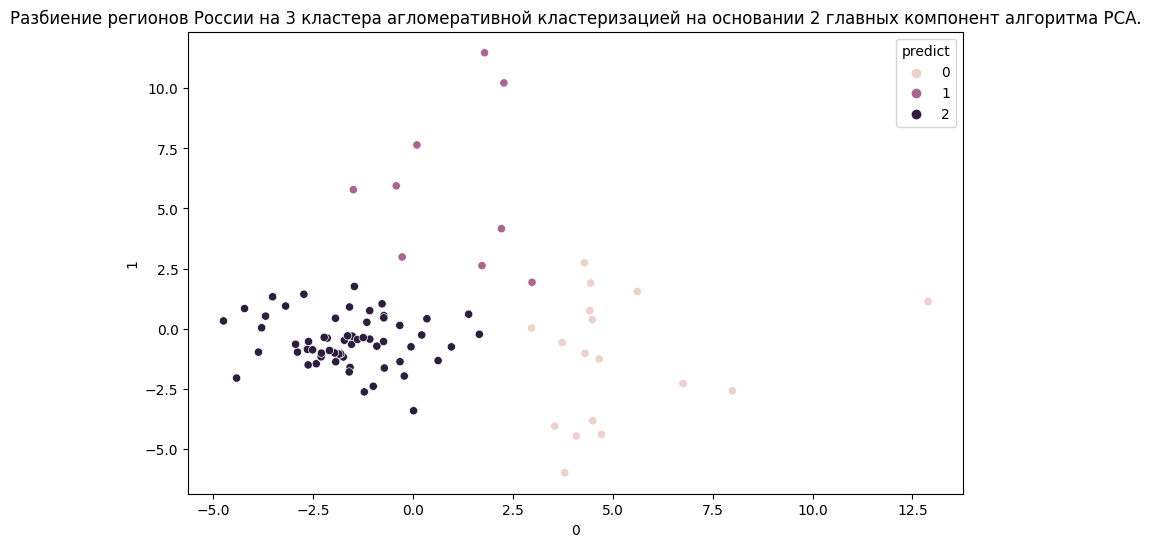

In [20]:
agglomerative_opt_3 = AgglomerativeClustering(n_clusters=3)
agglomerative_opt_3.fit(data_pca)
agglomerative_pca = data_pca.copy()
agglomerative_pca['predict'] = agglomerative_opt_3.labels_

figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=agglomerative_pca, x=0, y=1, hue='predict', ax=axes)
axes.set_title('Разбиение регионов России на 3 кластера агломеративной кластеризацией на основании 2 главных компонент алгоритма PCA.');

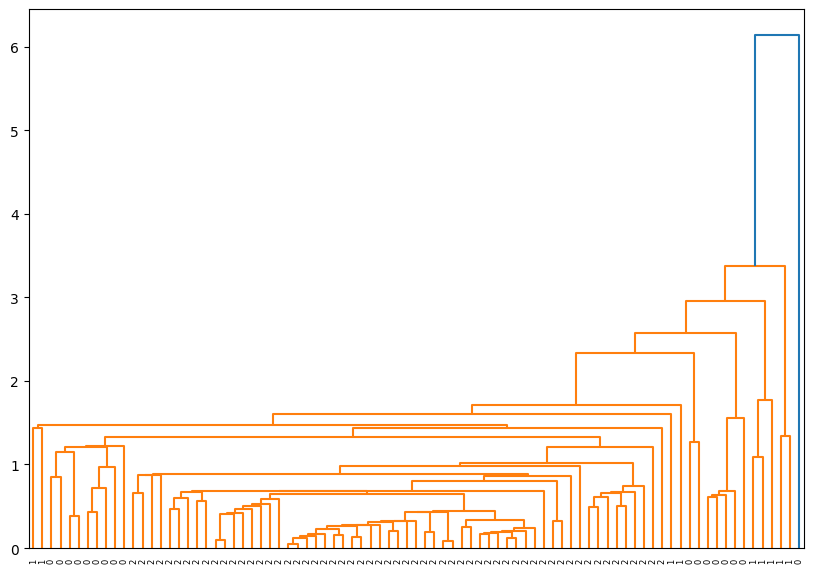

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_pca, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_opt_3.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

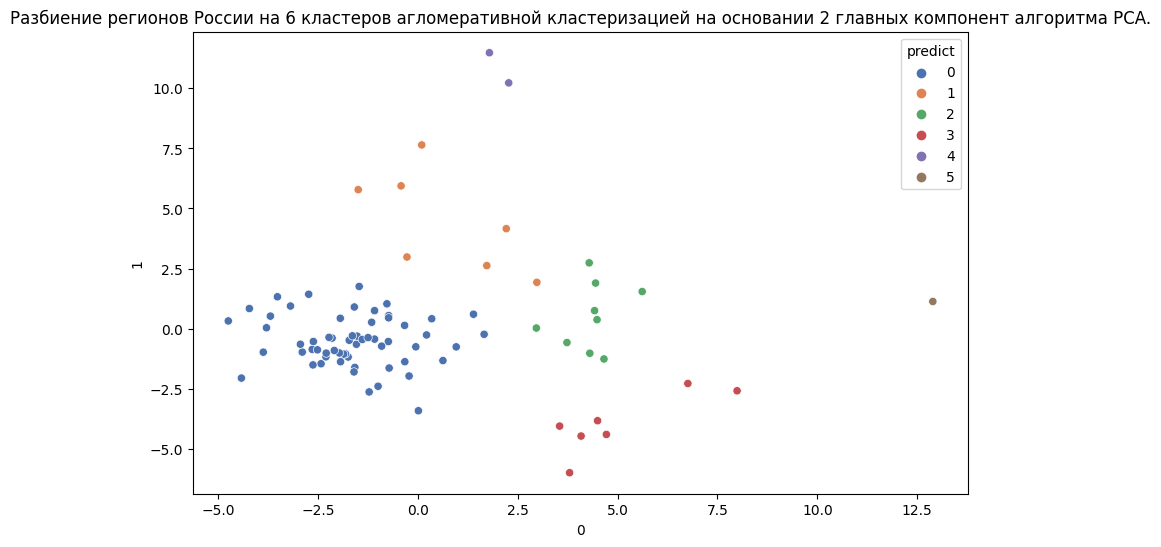

In [22]:
agglomerative_opt_6 = AgglomerativeClustering(n_clusters=6)
agglomerative_opt_6.fit(data_pca)
agglomerative_pca = data_pca.copy()
agglomerative_pca['predict'] = agglomerative_opt_6.labels_

figure, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=agglomerative_pca, x=0, y=1, hue='predict', palette='deep', ax=axes)
axes.set_title('Разбиение регионов России на 6 кластеров агломеративной кластеризацией на основании 2 главных компонент алгоритма PCA.');

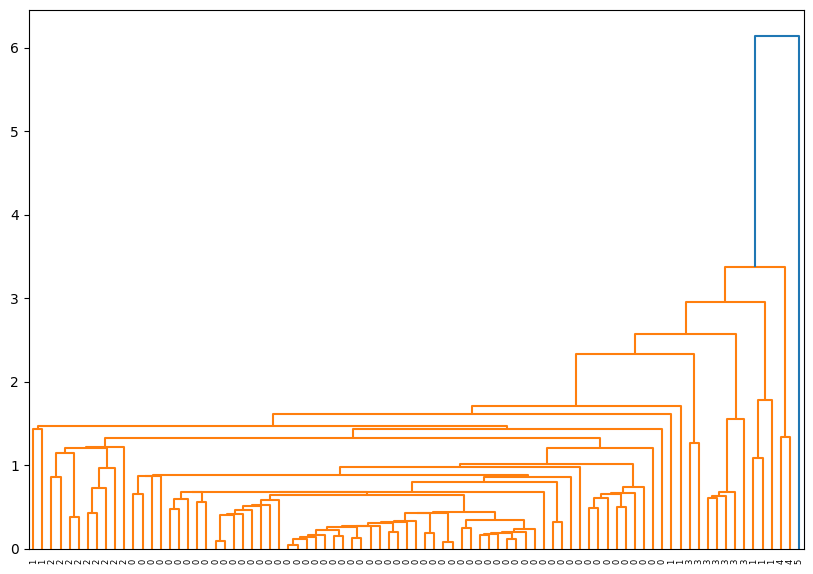

In [23]:
linked = linkage(data_pca, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_opt_6.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

In [24]:
print(f"Значение индекса Калински-Харабаса для алгоритма KMeans на 3 кластерах - {np.round(calinski_harabasz_score(data_pca, k_means_opt.labels_), 6)}.")
print(f"Значение индекса Калински-Харабаса для агломеративной кластеризации на 6 кластерах - {np.round(calinski_harabasz_score(data_pca, agglomerative_opt_6.labels_), 6)}.")

Значение индекса Калински-Харабаса для алгоритма KMeans на 3 кластерах - 81.989528.
Значение индекса Калински-Харабаса для агломеративной кластеризации на 6 кластерах - 71.515624.


##### По индексу Калински-Харабаса агломеративная кластеризация на 3 кластера лучше.